In [16]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

In [17]:
# import machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix

In [18]:
# import dataset from GoogleDrive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
titanic_data = pd.read_csv("/content/drive/My Drive/ML Project/Data/titanic/train.csv")

In [20]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data = titanic_data

# size of data
data_size = len(titanic_data)

# missing values
data_missing = data.isnull().sum()
data_missing = data_missing[data_missing > 0]
print("missing data: \n", data_missing)

missing data: 
 Age         177
Cabin       687
Embarked      2
dtype: int64


In [22]:
# fill missing data for Age field
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [23]:
# combine siblings and parent count into a single field family_size
data['family_size'] = data['SibSp'] + data['Parch']

# drop fields SibSp, Parch
data = data.drop(['SibSp', 'Parch'], axis = 1)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [24]:
# group the survival by cabin 
data.groupby(data['Cabin'].isnull())['Survived'].mean()

# 1 if cabin is missing, 0 if not
data['cabin_missing'] = np.where(data['Cabin'].isnull(), 1, 0)

In [25]:
# encode the 'Sex' field, male as 0 and female as 1
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_size,cabin_missing
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,1


In [27]:
# drop the non relevant data fields
data = data.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis = 1)

In [28]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,family_size,cabin_missing
0,1,0,3,0,22.0,7.2500,1,1
1,2,1,1,1,38.0,71.2833,1,0
2,3,1,3,1,26.0,7.9250,0,1
3,4,1,1,1,35.0,53.1000,1,0
4,5,0,3,0,35.0,8.0500,0,1


Random Forest From Library

In [29]:
input = data.drop('Survived', axis = 1)
output = data['Survived']

In [30]:
# create train and test data
X_train, X_test, Y_train, Y_test = train_test_split(input, output, test_size = 0.3, random_state = 20)

In [31]:
#Create a Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=250, random_state = 20)

random_forest_classifier.fit(X_train,Y_train)

predicted_output = random_forest_classifier.predict(X_test)

In [32]:
random_forest_from_library_accuracy = round((predicted_output==Y_test).sum() / len(predicted_output), 3)
print(f"Accuracy of Random Forest from Library model: {random_forest_from_library_accuracy * 100} %")

Accuracy of Random Forest from Library model: 79.9 %


Gradient Boosted From Library

In [33]:
# Instantiate GradientBoostingClassifier with best hyperparameters 
gradient_boosted_classifier = GradientBoostingClassifier(n_estimators = 50, learning_rate = 1, random_state = 20)

gradient_boosted_model = gradient_boosted_classifier.fit(X_train, Y_train)

gradient_boosted_predictions = gradient_boosted_model.predict(X_test)

gradient_boosted_accuracy = round((gradient_boosted_predictions == Y_test).sum() / len(gradient_boosted_predictions), 3)
print(f"Accuracy of Gradient Boosted Trees from library model: {gradient_boosted_accuracy * 100} %")

Accuracy of Gradient Boosted Trees from library model: 78.0 %


Forest of Gradient Boosted Trees

In [34]:
gbt_model = GradientBoostingClassifier(n_estimators = 50, learning_rate = 1, random_state = 20, max_features = 'auto')

In [40]:
def get_forest_prediction(models, X_test):
    predictions = list()
    for i in range(len(X_test)):
        prediction = [model.predict(X_test.values[i].reshape(1,-1)) for model in models]
        final_prediction = max(prediction, key = prediction.count)
        predictions.append(final_prediction)
    return np.array(predictions)


In [41]:
def generate_forest(X_train, Y_train, estimators_count):
    trees = list()
    for i in range(estimators_count):
        boot_x, boot_y = create_bootstrap(X_train, Y_train)
        forest_model = gbt_model
        model = forest_model.fit(boot_x, boot_y)
        trees.append(model)
    return trees

In [42]:
def create_bootstrap(X_train, Y_train):
    indexes = list(np.random.choice(range(len(X_train)), len(X_train), replace = True))
    boot_x = X_train.iloc[indexes].values
    boot_y = Y_train[indexes]
    return boot_x, boot_y

In [43]:
features = ['Pclass','Sex','Age', 'Fare', 'family_size', 'cabin_missing']
data_for_fores_of_gbt = data
train_count = int(np.floor(0.9 * len(data_for_fores_of_gbt)))
data_for_fores_of_gbt = data_for_fores_of_gbt.sample(frac=1, random_state=20)
X_train = data_for_fores_of_gbt[features][:train_count]
y_train = data_for_fores_of_gbt['Survived'][:train_count].values
X_test = data_for_fores_of_gbt[features][train_count:]
y_test = data_for_fores_of_gbt['Survived'][train_count:].values

In [44]:
model = generate_forest(X_train, y_train, estimators_count=250)

In [45]:
forest_of_gbt_predictions = get_forest_prediction(model, X_test)

In [46]:
forest_of_gbt_predictions = pd.Series(forest_of_gbt_predictions.flatten().tolist())

In [47]:
forest_of_gbt_accuracy = round((forest_of_gbt_predictions==y_test).sum() / len(forest_of_gbt_predictions), 3)
print(f"Accuracy of Forest of Gradient Boosted Trees: {forest_of_gbt_accuracy * 100} %")

Accuracy of Forest of Gradient Boosted Trees: 85.6 %


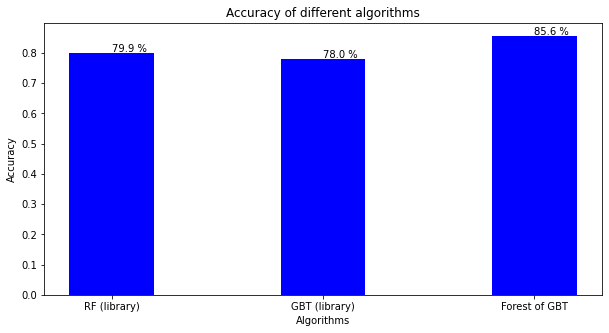

In [48]:
# creating the data for plotting bar plot
plot_data = {'RF (library)':random_forest_from_library_accuracy, 'GBT (library)':gradient_boosted_accuracy, 'Forest of GBT':forest_of_gbt_accuracy}
algo = list(plot_data.keys())
acc = list(plot_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algo, acc, color ='blue',
        width = 0.4)

for i in range(len(algo)):
    plt.text(i, acc[i] + 0.005, str(round(acc[i] * 100, 2)) + " %")
 
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of different algorithms")
plt.show()